In [ ]:
# Mounting drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Fire detection Bayesian Convolutional Network

In [ ]:
#Import necessary packages
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow_probability as tfp
from keras.utils import np_utils
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
#import splitfolders
import cv2
import os
tfd = tfp.distributions
tfpl = tfp.layers
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()
for file in uploaded:
  print("file name : {} , length: {}".format(file,len(file)))

Saving bayesian_cnn_project.py to bayesian_cnn_project.py
Saving plot_model.py to plot_model.py
file name : bayesian_cnn_project.py , length: 23
file name : plot_model.py , length: 13


In [ ]:
import bayesian_cnn_project
import plot_model

In [ ]:
# We will split our data into train and test sets

door= os.path.join('/content/gdrive/MyDrive/fire_dataset/')
room= os.path.join('/content/gdrive/MyDrive/fire_dataset/train_test_splitted/')

# We will split and allocate the folders

splitfolders.ratio(door, room, seed=5896, ratio=(0.90,0.10), group_prefix= None)

In [ ]:
train_dir = os.path.join('/content/gdrive/MyDrive/train_test_splitted/train')
test_dir = os.path.join('/content/gdrive/MyDrive/train_test_splitted/val')

In [ ]:
train_dataset, validation_dataset = bayesian_cnn_project.loader_image(train_dir, test_dir,(80,80))

Found 1104 images belonging to 2 classes.
Found 124 images belonging to 2 classes.


In [ ]:
# ... just to check the classes

print(train_dataset.class_indices, validation_dataset.class_indices)


{'fire_images': 0, 'non_fire_images': 1} {'fire_images': 0, 'non_fire_images': 1}


In [ ]:
# number of files
number_of_files=bayesian_cnn_project.number_train_images(train_dir)
number_of_files

1104

# Implementing the Bayesian CNN model

In [ ]:
model_1=bayesian_cnn_project.bayesian_convolutional_model(
                                        input_shape=(80,80,3),
                                        loss = bayesian_cnn_project.nll ,
                                        optimizer = Adam(learning_rate=0.001),
                                        metrics = ['accuracy'],
                                        path_to_train_folder=train_dir
                                        )
model_1.summary()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer.py:2281: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_reparameterization (C (None, 80, 80, 8)         12304     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 8)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 37, 37, 32)        4128      
_________________________________________________________________
dropout (Dropout)            (None, 37, 37, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 64)        32832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 64)        0

In [ ]:
history_BCNN=model_1.fit(train_dataset,validation_data=validation_dataset,batch_size=80, epochs=500,verbose=1)

Epoch 1/500
23/23 [==============================] - 336s 14s/step - loss: 16.7684 - accuracy: 0.6051 - val_loss: 16.4404 - val_accuracy: 0.8710
Epoch 2/500
23/23 [==============================] - 24s 1s/step - loss: 16.2917 - accuracy: 0.8727 - val_loss: 16.1946 - val_accuracy: 0.8790
Epoch 3/500
23/23 [==============================] - 24s 1s/step - loss: 16.1526 - accuracy: 0.8487 - val_loss: 16.2487 - val_accuracy: 0.7097
Epoch 4/500
23/23 [==============================] - 24s 1s/step - loss: 16.1654 - accuracy: 0.7985 - val_loss: 16.0510 - val_accuracy: 0.8871
Epoch 5/500
23/23 [==============================] - 24s 1s/step - loss: 15.9641 - accuracy: 0.8669 - val_loss: 15.8712 - val_accuracy: 0.9113
Epoch 6/500
23/23 [==============================] - 24s 1s/step - loss: 15.9111 - accuracy: 0.8290 - val_loss: 15.7519 - val_accuracy: 0.9113
Epoch 7/500
23/23 [==============================] - 24s 1s/step - loss: 15.7073 - accuracy: 0.8707 - val_loss: 15.6320 - val_accuracy: 0.91

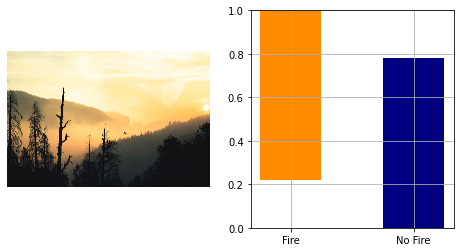

In [ ]:
image_dir_1 = os.path.join('/content/gdrive/MyDrive/Check_file/fire.762.jpg')
plot_model.know_your_image(image_dir_1,(80,80),model_1)

In the above image, the model is not so sure about the correct class of the image.

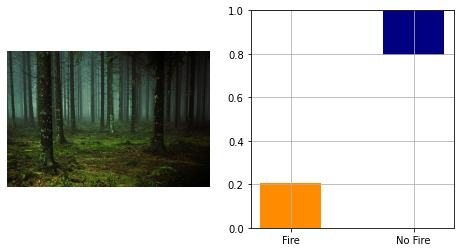

In [ ]:
image_dir_2=os.path.join('/content/gdrive/MyDrive/Check_file/non_fire.297.jpg')
plot_model.know_your_image(image_dir_2,(80,80),model_1)

In this plot, we see that the model is quite certain that the image is a non_fire image.

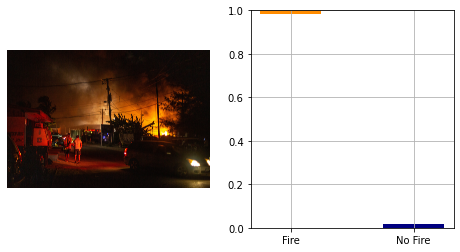

In [ ]:
image_dir_3=os.path.join('/content/gdrive/MyDrive/Check_file/fire.757.jpg')
plot_model.know_your_image(image_dir_3,(80,80),model_1)

Here we can say that the model is almost 100% certain that the image is a fire image.

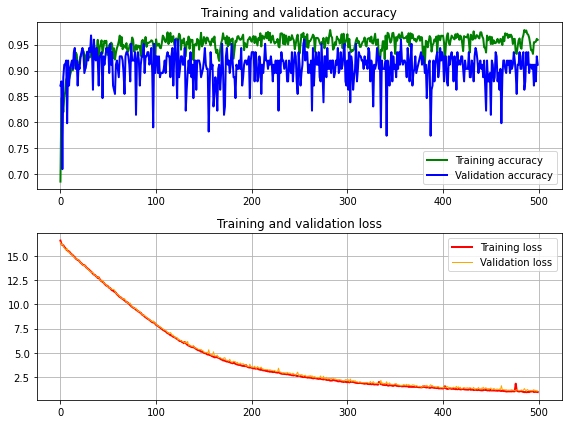

In [ ]:
acc = history_BCNN.history['accuracy']
val_acc = history_BCNN.history['val_accuracy']
loss = history_BCNN.history['loss']
val_loss = history_BCNN.history['val_loss']

epochs = range(len(acc))

# Plot the accuracy and loss
fig, ax = plt.subplots(2, figsize=(8,6))

# accuracy
ax[0].grid()
ax[0].plot(epochs, acc, 'g',linewidth=2, label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b',linewidth=2, label='Validation accuracy')
ax[0].set_title('Training and validation accuracy')
ax[0].legend()

# Loss
ax[1].grid()
ax[1].plot(epochs, loss, 'r',linewidth=2, label='Training loss')
ax[1].plot(epochs, val_loss, 'orange',linewidth=1, label='Validation loss')
ax[1].set_title('Training and validation loss')
ax[1].legend()
_=fig.tight_layout()

Here we see that the loss remains quite high over the epochs. Here the loss function is not a perfect measure to check the model quality because a bayesian CNN considers at least two losses, viz. the KL divergence and the negative log likelihood.

Hyper parameter tuning

In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 6.6MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp36-none-any.whl size=78939 sha256=9ec30fb7a60dbe91cecbde4836f30df47d0aad31a060a843da590a4dc451fc3a
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15358 sha256=4b24133a572bdb45a43ec3f36eb295b59af3aa21c763e49928bdceebaa5fcf5d
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
import kerastuner as kt
from kerastuner import BayesianOptimization
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
kl_divergence_fn = lambda q,p,_:tfd.kl_divergence(q,p)/number_of_files

Here we conduct a hypertuning of few model parameters. We consider the kernel size of the first layer, the activation function and the dropout values.

In [ ]:
# function for searching best suited hyper parameter
def tuning_model(hp):
  cnn_model=Sequential([
                        # Dense reparameterizational layers
                        tfpl.Convolution2DReparameterization(
                                filters=8,
                                kernel_size=hp.Choice('1st_layer_kernel_size', values=[2,4,6,8,10,12,14,16,18,20]),
                                input_shape=(80,80,3), padding='SAME',
                                activation=hp.Choice('1st_layer_activation',values=['relu', 'tanh', 'sigmoid']),
                                #Kernel details
                                kernel_prior_fn = tfpl.default_multivariate_normal_fn,
                                kernel_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                kernel_divergence_fn = kl_divergence_fn,
                                #Bias details
                                bias_prior_fn = tfpl.default_multivariate_normal_fn,
                                bias_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                bias_posterior_tensor_fn=(lambda d: d.sample()),
                                bias_divergence_fn = kl_divergence_fn),
                        
                        # Additional layers
                            MaxPooling2D(2,2),
                            Conv2D(16,4),
                            Dropout(rate=hp.Float(
                                      'dropout_3',
                                      min_value=0.0,
                                      max_value=0.5,
                                      default=0.25,
                                      step=0.05)
                                    ),
                            MaxPooling2D(2,2),
                            Conv2D(64, 4),
                            Dropout(rate=hp.Float(
                                      'dropout_3',
                                      min_value=0.0,
                                      max_value=0.5,
                                      default=0.25,
                                      step=0.05)
                                    ),
                            MaxPooling2D(2,2),
                            Conv2D(64, 4),
                            Dropout(rate=hp.Float(
                                      'dropout_3',
                                      min_value=0.0,
                                      max_value=0.5,
                                      default=0.25,
                                      step=0.05)
                                    ),
                            MaxPooling2D(2,2),
                            Flatten(),
                            Dense(
                                hp.Int('Dense_units', min_value=32, max_value=512, step=64)
                                 ),
                        
                            # Dense reparameterizational layers
                            tfpl.DenseReparameterization(
                                units=tfpl.OneHotCategorical.params_size(2), activation=None,
                                #Kernel details
                                kernel_prior_fn = tfpl.default_multivariate_normal_fn,
                                kernel_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                kernel_posterior_tensor_fn=(lambda d: d.sample()),
                                kernel_divergence_fn = kl_divergence_fn,
                                #Bias details
                                bias_prior_fn = tfpl.default_multivariate_normal_fn,
                                bias_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                bias_posterior_tensor_fn=(lambda d: d.sample()),
                                bias_divergence_fn = kl_divergence_fn),
        tfpl.OneHotCategorical(2,convert_to_tensor_fn=tfd.Distribution.mode)
        ])
  cnn_model.compile(
              optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss=bayesian_cnn_project.nll,
              metrics=['accuracy'])
  
  return cnn_model

In [ ]:
tuned_sets=BayesianOptimization(tuning_model,
                                objective = 'val_accuracy', 
                                max_trials = 5,
                                directory='/content/gdrive/MyDrive/',
                                project_name='Hypertuned_BayesianCNN_for_fire_detection'
                               )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer.py:2281: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


In [ ]:
tuned_sets.search(train_dataset, validation_data=validation_dataset,epochs=20)

Trial 5 Complete [00h 07m 59s]
val_accuracy: 0.9354838728904724

Best val_accuracy So Far: 0.9354838728904724
Total elapsed time: 00h 40m 13s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuned_model=tuned_sets.get_best_models(num_models=1)[0]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer.py:2281: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


In [ ]:
tuned_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_reparameterization (C (None, 80, 80, 8)         19216     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 8)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 37, 37, 16)        2064      
_________________________________________________________________
dropout (Dropout)            (None, 37, 37, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 64)        16448     
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 64)        0

In [ ]:
tuned_model.fit(train_dataset,validation_data=validation_dataset, epochs=50,verbose=1)

Epoch 1/50
23/23 [==============================] - 25s 1s/step - loss: 21.4162 - accuracy: 0.9321 - val_loss: 21.7447 - val_accuracy: 0.9194
Epoch 2/50
23/23 [==============================] - 25s 1s/step - loss: 21.3591 - accuracy: 0.9040 - val_loss: 21.3894 - val_accuracy: 0.8952
Epoch 3/50
23/23 [==============================] - 24s 1s/step - loss: 21.1847 - accuracy: 0.9149 - val_loss: 21.3454 - val_accuracy: 0.8790
Epoch 4/50
23/23 [==============================] - 24s 1s/step - loss: 21.1193 - accuracy: 0.8804 - val_loss: 21.2260 - val_accuracy: 0.9274
Epoch 5/50
23/23 [==============================] - 24s 1s/step - loss: 20.9380 - accuracy: 0.8958 - val_loss: 20.8813 - val_accuracy: 0.9032
Epoch 6/50
23/23 [==============================] - 24s 1s/step - loss: 20.8521 - accuracy: 0.8832 - val_loss: 20.7835 - val_accuracy: 0.9274
Epoch 7/50
23/23 [==============================] - 24s 1s/step - loss: 20.6448 - accuracy: 0.9203 - val_loss: 20.6323 - val_accuracy: 0.9274
Epoch 

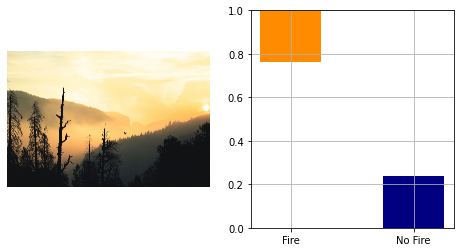

In [ ]:
plot_model.know_your_image(image_dir_1,(80,80),tuned_model)

Here we see that the model becomes more certain that the picture is a fire image.

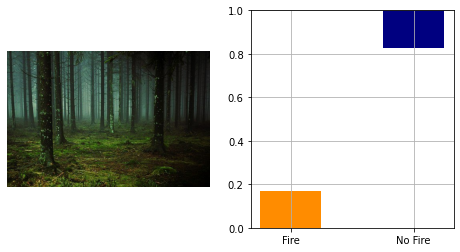

In [ ]:
 _=plot_model.know_your_image(image_dir_2,(80,80), tuned_model)

# Fire detection using Resnet50

In [ ]:
from google.colab import files
uploaded = files.upload()
for file in uploaded:
  print("file name : {} , length: {}".format(file,len(file)))

Saving plot_the_model.py to plot_the_model.py
Saving resnet50_tunned.py to resnet50_tunned.py
file name : plot_the_model.py , length: 17
file name : resnet50_tunned.py , length: 18


In [ ]:
!pip install split-folders

In [ ]:
# importing packages

# Importing dataset
import os
import numpy as np

# Modifying dataset
from torchvision.transforms import transforms


# Modelling
from torchvision import datasets
import torchvision
import torch
import torchvision.models as models
import torch.nn as nn
import plot_the_model
import resnet50_tunned

#Visualization
from PIL import Image
import matplotlib.pyplot as plt



Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
training_set = "/content/drive/MyDrive/train_test_split_data/train/"
validation_set = "/content/drive/MyDrive/train_test_split_data/val/"
transform = transforms.Compose([
    transforms.Resize(size=(256,256)),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
loader = resnet50_tunned.dataset(training_set, validation_set, 64, 0, transform)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model =resnet50_tunned.initialize_model(
                num_classes = 2, 
                feature_extract = True, 
                use_pretrained=True)

use_cuda = torch.cuda.is_available()
if use_cuda:
    model = model.cuda()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
# Loss function
criterion = torch.nn.CrossEntropyLoss()

# To optimize the model
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.0005)

# Number of epochs
n_epochs = 100

#loader = dataset(training_set, validation_set, 64, 0, transform=transform)
model1 = resnet50_tunned.train(n_epochs, loader, model, optimizer, criterion, use_cuda, '/content/drive/MyDrive/model_train.pth')

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch: 1 	Training Acc: 0.983696 	Training Loss: 0.000357 	Validation Acc: 0.980519 	Validation Loss: 0.001076
Validation loss decreased (inf --> 0.001076).  Saving model ...
Epoch: 2 	Training Acc: 0.979348 	Training Loss: 0.000363 	Validation Acc: 0.987013 	Validation Loss: 0.001063
Validation loss decreased (0.001076 --> 0.001063).  Saving model ...
Epoch: 3 	Training Acc: 0.982609 	Training Loss: 0.000362 	Validation Acc: 0.954545 	Validation Loss: 0.001147
Epoch: 4 	Training Acc: 0.975000 	Training Loss: 0.000366 	Validation Acc: 0.987013 	Validation Loss: 0.001059
Validation loss decreased (0.001063 --> 0.001059).  Saving model ...
Epoch: 5 	Training Acc: 0.991304 	Training Loss: 0.000351 	Validation Acc: 0.987013 	Validation Loss: 0.001064
Epoch: 6 	Training Acc: 0.992391 	Training Loss: 0.000349 	Validation Acc: 0.987013 	Validation Loss: 0.001065
Epoch: 7 	Training Acc: 0.984783 	Training Loss: 0.000357 	Validation Acc: 0.983766 	Validation Loss: 0.001064
Epoch: 8 	Training Ac

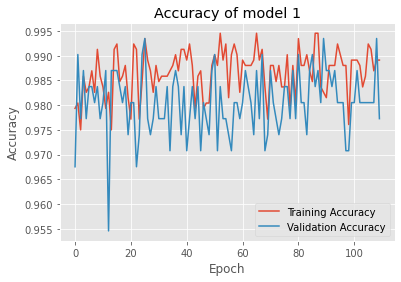

In [ ]:
def plot_accuracy (n_epochs, train, valid):
    plt.style.use ("ggplot")
    plt.figure()

    plt.plot(train, label = "Training Accuracy")
    plt.plot(valid, label = "Validation Accuracy")

    plt.title("Accuracy of model 1")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc="lower right")


plot_accuracy (100, train_accuracy_list, valid_accuracy_list)

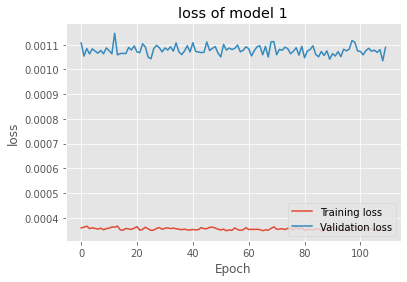

In [ ]:
def plot_loss (n_epochs, train, valid):
    plt.style.use ("ggplot")
    plt.figure()

    plt.plot(train, label = "Training loss")
    plt.plot(valid, label = "Validation loss")

    plt.title("loss of model 1")
    plt.xlabel("Epoch")
    plt.ylabel("loss")
    plt.legend(loc="lower right")


plot_loss (100, train_loss_list, valid_loss_list)

In [ ]:
# Saving the values 
torch.save(model1, '/content/drive/MyDrive/model_final.pth')

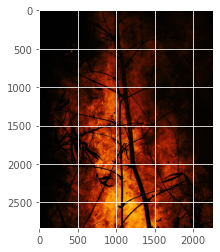

Fire 100.0


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [ ]:
img = Image.open('/content/drive/MyDrive/Check_file/fire.759.jpg')
plt.imshow(img)
plt.show()

prediction, prob = plot_the_model.predict_model(img, "/content/drive/MyDrive/model_final.pth")
print(prediction, prob)

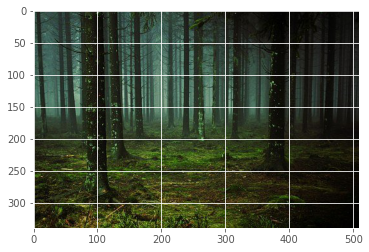

No_fire 99.9998927116394


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [ ]:
img = Image.open('/content/drive/MyDrive/Check_file/non_fire.297.jpg')
plt.imshow(img)
plt.show()

prediction, prob = plot_the_model.predict_model(img, "/content/drive/MyDrive/model_final.pth")
print(prediction, prob)

In [ ]:
model =resnet50_tunned.initialize_model_2(
                    num_classes = 2, 
                    feature_extract = True, 
                    use_pretrained=True)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

use_cuda = torch.cuda.is_available()
if use_cuda:
    model = model.cuda()

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)

# Number of epochs
n_epochs = 100

#loader = dataset(training_set, validation_set, 64, 0, transform=transform)
model2 = resnet50_tunned.train(n_epochs, loader, model, optimizer, criterion, use_cuda, "/content/drive/MyDrive/model_train_1.pth")

Epoch: 1 	Training Acc: 0.559783 	Training Loss: 0.000746 	Validation Acc: 0.620130 	Validation Loss: 0.002168
Validation loss decreased (inf --> 0.002168).  Saving model ...
Epoch: 2 	Training Acc: 0.617391 	Training Loss: 0.000711 	Validation Acc: 0.613636 	Validation Loss: 0.002072
Validation loss decreased (0.002168 --> 0.002072).  Saving model ...
Epoch: 3 	Training Acc: 0.617391 	Training Loss: 0.000687 	Validation Acc: 0.613636 	Validation Loss: 0.002016
Validation loss decreased (0.002072 --> 0.002016).  Saving model ...
Epoch: 4 	Training Acc: 0.616304 	Training Loss: 0.000673 	Validation Acc: 0.613636 	Validation Loss: 0.001978
Validation loss decreased (0.002016 --> 0.001978).  Saving model ...
Epoch: 5 	Training Acc: 0.615217 	Training Loss: 0.000656 	Validation Acc: 0.623377 	Validation Loss: 0.001934
Validation loss decreased (0.001978 --> 0.001934).  Saving model ...
Epoch: 6 	Training Acc: 0.633696 	Training Loss: 0.000646 	Validation Acc: 0.636364 	Validation Loss: 0.0

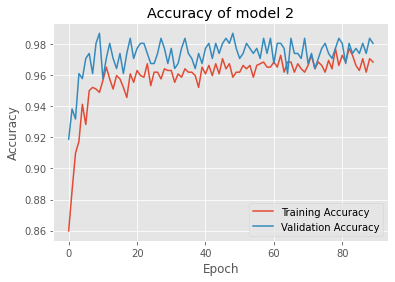

In [ ]:
def plot_accuracy_model2(epochs, train, valid):
    plt.style.use ("ggplot")
    plt.figure()

    plt.plot(train, label = "Training Accuracy")
    plt.plot(valid, label = "Validation Accuracy")

    plt.title("Accuracy of model 2")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc="lower right")

plot_accuracy_model2 (100, train_accuracy_list[120:], valid_accuracy_list[120:])

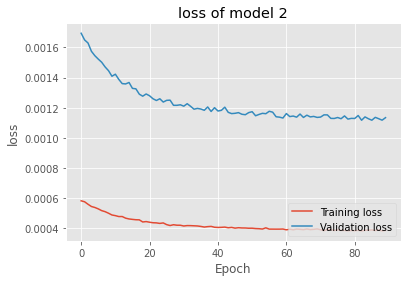

In [ ]:
def plot_loss (n_epochs, train, valid):
    plt.style.use ("ggplot")
    plt.figure()

    plt.plot(train, label = "Training loss")
    plt.plot(valid, label = "Validation loss")

    plt.title("loss of model 2")
    plt.xlabel("Epoch")
    plt.ylabel("loss")
    plt.legend(loc="lower right")


plot_loss (100, train_loss_list[120:], valid_loss_list[120:])

In [ ]:
# Saving the values 
torch.save(model2, '/content/drive/MyDrive/model_final_1.pth')

In [ ]:
print("[INFO] loading model...")
model = torch.load('/content/drive/MyDrive/model_final_1.pth')

[INFO] loading model...


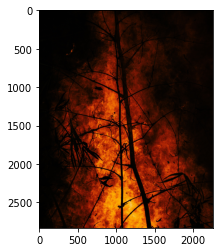

Fire 97.20130562782288


In [ ]:
img = Image.open('/content/drive/MyDrive/Check_file/fire.759.jpg')
plt.imshow(img)
plt.show()

prediction, prob = plot_the_model.predict_model(img, "/content/drive/MyDrive/model_final_1.pth")
print(prediction, prob)

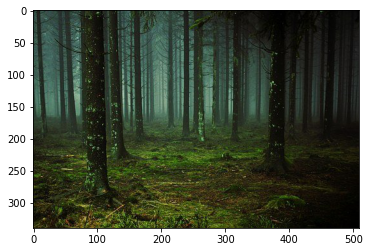

No_fire 94.43700909614563


In [ ]:
img = Image.open('/content/drive/MyDrive/Check_file/non_fire.297.jpg')
plt.imshow(img)
plt.show()

prediction, prob = plot_the_model.predict_model(img, "/content/drive/MyDrive/model_final_1.pth")
print(prediction, prob)